## Install and  Import prerequisites

In [1]:
from IPython.display import clear_output
!pip3 install ultralytics
clear_output()

In [2]:
import os
import glob
import yaml
from ultralytics import YOLO
import random
import cv2
import matplotlib.pyplot as plt
import kagglehub


## Download and extract dataset

In [3]:
# Download latest version
path = kagglehub.dataset_download("snehilsanyal/construction-site-safety-image-dataset-roboflow")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/versions/3


In [4]:
data_path = '/root/.cache/kagglehub/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/versions/3/css-data'

In [5]:
class_map = {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat',
             3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone',
             7: 'Safety Vest', 8: 'machinery', 9: 'vehicle'}

classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person',
           'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

## Evalation metrics

In [7]:
model = YOLO('../Model/CSS_Model.pt')

In [8]:
model.eval()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
 

In [8]:
metrics_test = model.val(split='test')

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /root/.cache/kagglehub/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/versions/3/css-data/test/labels.cache... 82 images, 8 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]


                   all         82        760      0.862      0.699      0.775       0.48
               Hardhat         30        110      0.964      0.818      0.935        0.6
                  Mask         16         28      0.971       0.75      0.792      0.508
            NO-Hardhat         25         41      0.781      0.537      0.587      0.337
               NO-Mask         30         79      0.903      0.658      0.776      0.372
        NO-Safety Vest         36         90      0.971      0.733      0.829      0.479
                Person         59        174      0.816      0.764      0.824       0.51
           Safety Cone          8         92      0.786      0.457      0.494      0.226
           Safety Vest         22         61      0.767      0.869      0.892      0.616
             machinery         22         44      0.821      0.795      0.839      0.654
               vehicle         15         41      0.839       0.61      0.778      0.502
Speed: 5.5ms preproce

In [9]:
print(f"Mean Average Precision @.5:.95 : {metrics_test.box.map}")
print(f"Mean Average Precision @ .50   : {metrics_test.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics_test.box.map75}")

Mean Average Precision @.5:.95 : 0.4803968941098969
Mean Average Precision @ .50   : 0.7747391703607868
Mean Average Precision @ .70   : 0.5193093516792799


In [10]:
metrics_val = model.val(split='val')
print(f"Mean Average Precision @.5:.95 : {metrics_val.box.map}")
print(f"Mean Average Precision @ .50   : {metrics_val.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics_val.box.map75}")

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /root/.cache/kagglehub/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/versions/3/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        114        697      0.867      0.743      0.813      0.503
               Hardhat         42         79      0.873      0.772      0.889      0.542
                  Mask         19         21       0.95      0.857       0.89      0.616
            NO-Hardhat         37         69      0.834      0.584      0.698      0.353
               NO-Mask         44         74      0.835      0.617      0.651      0.327
        NO-Safety Vest         56        106      0.866      0.708      0.783      0.477
                Person         84        166      0.862      0.753      0.836      0.537
           Safety Cone         13         44        0.9      0.909      0.908      0.518
           Safety Vest         28         41       0.97      0.789      0.911        0.6
             machinery         26         55      0.865      0.891      0.934      0.695
               vehicle         16         42      0.709      0.548      0.626      0.364
Speed: 7.8ms preproce

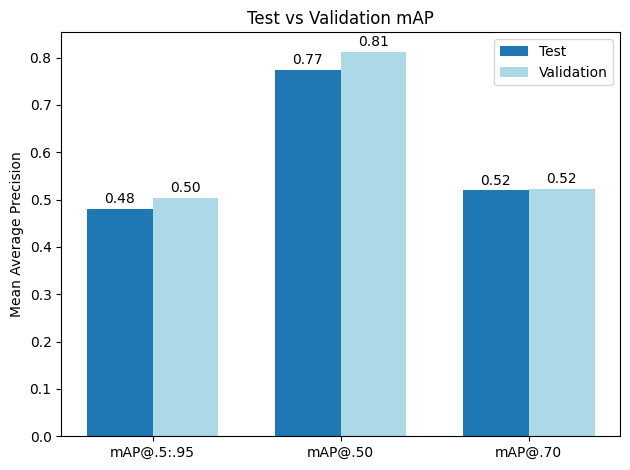

In [11]:
test_map = [metrics_test.box.map, metrics_test.box.map50,metrics_test.box.map75]
val_map =   [metrics_val.box.map, metrics_val.box.map50,metrics_val.box.map75]
metrics = ['mAP@.5:.95', 'mAP@.50', 'mAP@.70']

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, test_map, width, label='Test')
rects2 = ax.bar([i + width for i in x], val_map, width, label='Validation',color='lightblue')

ax.set_ylabel('Mean Average Precision')
ax.set_title('Test vs Validation mAP')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [17]:
print(f"Test Recall: {metrics_test.box.mr}")
print(f"Validation Recall: {metrics_val.box.mr}")
print(f"Test Precision: {metrics_test.box.mp}")
print(f"Validation Precision: {metrics_val.box.mp}")

Test Recall: 0.6991281022724378
Validation Recall: 0.7426548827215915
Test Precision: 0.8618679662075619
Validation Precision: 0.8665604778085649


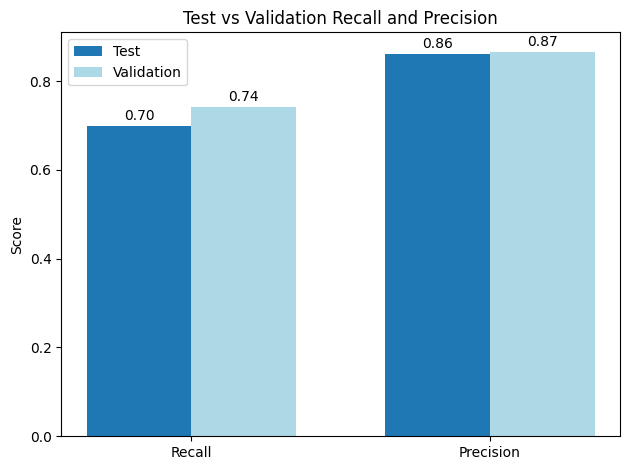

In [19]:
test_metrics = [metrics_test.box.mr, metrics_test.box.mp]
val_metrics = [metrics_val.box.mr, metrics_val.box.mp]
metrics_labels = ['Recall', 'Precision']

x = range(len(metrics_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, test_metrics, width, label='Test')
rects2 = ax.bar([i + width for i in x], val_metrics, width, label='Validation', color='lightblue')

ax.set_ylabel('Score')
ax.set_title('Test vs Validation Recall and Precision')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(metrics_labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()